STUDENT NAME: Peter Bisimbeko

STUDENT NO : SEP21/COMP/903U

Machine Learning Exam

<b>Question Three</b>
Use K- Nearest Neighbors (KNN) Classifier to model the data set classifying and evaluation of classes of iris by:
(Hint: Submit the screen shot of your codes where necessary).

a)	Generating the KNN figure (8 marks)

b)	Evaluate the KNN classifier using Jaccard index, F1- scores, and log loss metrics  (12 marks)

c)	Explain the results shown in the decision trees algorithm. (4 marks)

Total 20 Marks 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,class
95,7.2,3.0,5.8,1.6,virginica
96,7.4,2.8,6.1,1.9,virginica
97,7.9,3.8,6.4,2.0,virginica
98,6.4,2.8,5.6,2.2,virginica
99,6.3,2.8,5.1,1.5,virginica


In [4]:
# Visualization
df['class'].value_counts()

virginica     34
versicolor    34
setosa        32
Name: class, dtype: int64

array([[<AxesSubplot:title={'center':'sepalLength'}>]], dtype=object)

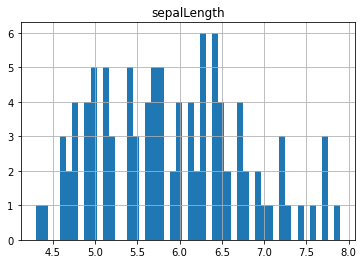

In [5]:
# plot histogram

df.hist(column = 'sepalLength',bins =50)

In [6]:
# Feature Set

df.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'], dtype='object')

In [7]:
# defining the independent features variables
X = df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
#Dependent feature
y =df[['class']].values
y[0:5]

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa']], dtype=object)

In [9]:
# Data Normalization

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.9552017 ,  1.04965641, -1.3797345 , -1.36551809],
       [-1.18989499, -0.09376016, -1.3797345 , -1.36551809],
       [-1.42458828,  0.36360647, -1.43602722, -1.36551809],
       [-1.54193493,  0.13492316, -1.32344179, -1.36551809],
       [-1.07254835,  1.27833973, -1.3797345 , -1.36551809]])

In [21]:
#Split,  Training 80% and Testing 20% 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 4) (80, 1)
Test set: (20, 4) (20, 1)


In [22]:
# Classification with KNN
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Training the Model
k = 4 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

<ipython-input-23-878c2ec89751>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [24]:
# Prediction
yhat =neigh.predict(X_test)
yhat

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

b)	Evaluate the KNN classifier using Jaccard index, F1- scores, and log loss metrics  (12 marks)

In [25]:
# Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train))*100, "%")
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)*100, "%")

Train set Accuracy:  95.0 %
Test set Accuracy:  90.0 %


In [26]:
# calculatig the accuracy of KNN for different K Values
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

<ipython-input-26-45f2999c10a3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
<ipython-input-26-45f2999c10a3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
<ipython-input-26-45f2999c10a3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
<ipython-input-26-45f2999c10a3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifie

array([0.9 , 0.95, 0.95, 0.9 , 0.95, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
       0.9 , 0.9 , 0.9 , 0.9 , 0.85, 0.85, 0.85, 0.85])

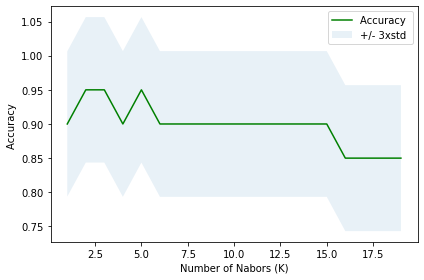

In [27]:
# Graph indication the detals and accuracy

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [28]:
# Verifying for the accurate K value

print( "Highest accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Highest accuracy was with 0.95 with k= 2


b)	Evaluate the KNN classifier using Jaccard index, F1- scores, and log loss metrics  (12 marks)

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8413875598086124

b)	Evaluate the KNN classifier using Jaccard index, F1- scores, and log loss metrics  (12 marks)

# Conclusion

KNN Algorithm has been able to classify the Iris dataset with oevrall F1 score of 0.84, translating the 84% accuracy. This happens when the value of random_state parameter is set to 100. However, setting the randomness to a lower value of 4, the Model's prediction increases to 100% with f1_score of 1.0. Hence KNN is recommend for this classification. 